## Load data

In [1]:
path = '../../../data/FRED/cpi_mr_2008_after.parquet'

In [2]:
import pandas as pd
df = pd.read_parquet(path)

df

,CPI,MR
date,,
2008-09-01,3.076678,6.375
2008-09-04,3.047182,6.350
...,...,...
2009-05-28,2.129682,4.910
2009-06-01,2.089895,5.100


## Linear regression

### Visualize relationship

In [3]:

from modules import utils
utils.configure_plotly_template()

In [4]:
import plotly.express as px

fig = px.scatter(df, x="MR", y="CPI")
fig.show()

### Feature selection

In [5]:
X = df[["MR"]]
y = df["CPI"]

In [6]:
import statsmodels.api as sm
X = sm.add_constant(X)  # Add an intercept to the model

### Fit model

In [7]:
from statsmodels.api import OLS
model = OLS(y, X).fit()
result = model.summary2().tables

result

### Interpret results

In [8]:
result[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.756
1,Dependent Variable:,CPI,AIC:,-63.2966
...,...,...,...,...
5,Df Residuals:,47,Prob (F-statistic):,3.15e-16
6,R-squared:,0.761,Scale:,0.015458


In [9]:
result[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,0.470707,0.172759,2.724654,9.010999e-03,0.123162,0.818252
MR,0.389426,0.031805,12.244048,3.152965e-16,0.325442,0.453410


In [10]:
result[2]

,0,1,2,3
0,Omnibus:,3.652,Durbin-Watson:,0.291
1,Prob(Omnibus):,0.161,Jarque-Bera (JB):,2.596
2,Skew:,-0.510,Prob(JB):,0.273
3,Kurtosis:,3.480,Condition No.:,55


## Trick to plot regression line

In [11]:
import plotly.express as px

fig = px.scatter(df, x="MR", y="CPI", trendline='ols')
fig.show()

In [12]:
r = px.get_trendline_results(fig)
r = r.iloc[0,0]

result = r.summary2()
result

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.756   
Dependent Variable: y                AIC:                -63.2966
Date:               2025-05-01 10:02 BIC:                -59.5130
No. Observations:   49               Log-Likelihood:     33.648  
Df Model:           1                F-statistic:        149.9   
Df Residuals:       47               Prob (F-statistic): 3.15e-16
R-squared:          0.761            Scale:              0.015458
--------------------------------------------------------------------
         Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const    0.4707      0.1728     2.7247    0.0090    0.1232    0.8183
x1       0.3894      0.0318    12.2440    0.0000    0.3254    0.4534
-----------------------------------------------------------------
Omnibus:               3.652        Durbin-Watson:          1.779
Prob(Omnibus):         0.161        Jarque-Bera (JB):       2.596
Skew:                  -0.510       Prob(JB):               0.273
Kurtosis:              3.480        Condition No.:          55   
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

## Diagnosis and assumptions

In [ ]:
df = pd.DataFrame(
    {
        "residuals": r.resid,
        "fitted": r.fittedvalues
    }
)

df

,residuals,fitted
0,-0.028783,2.332165
1,0.029428,2.332165
...,...,...
47,-0.176150,2.986401
48,-0.128572,2.986401


### Linearity & Homoscedasticity


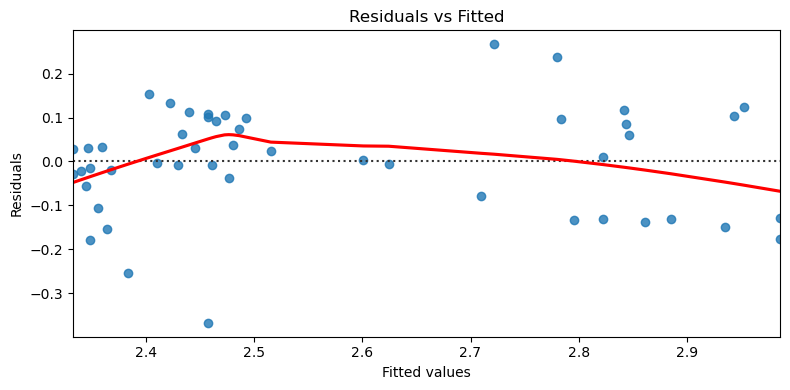

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.residplot(
    data=df,
    x="fitted",
    y="residuals",
    lowess=True,
    line_kws={"color": "red"}
)

plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")

plt.tight_layout()
plt.show()

### Normality of residuals


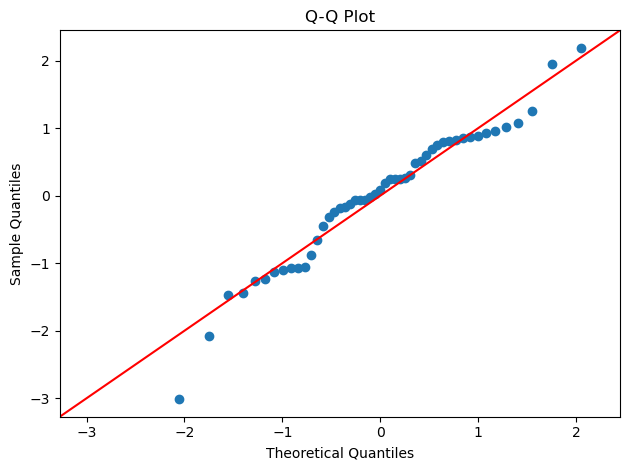

In [ ]:
sm.qqplot(df["residuals"], line="45", fit=True)
plt.title("Q-Q Plot")
plt.tight_layout()
plt.show()

### Shapiro-Wilk Test


In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(df["residuals"])
print(f"Shapiro-Wilk test: W={stat:.3f}, p-value={p:.3f}")

Shapiro-Wilk test: W=0.967, p-value=0.186


### Durbin-Watson (Independence)


In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(df["residuals"])
print(f"Durbin-Watson: {dw:.3f}")

Durbin-Watson: 1.779


### Breusch-Pagan test (Homoscedasticity)


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(df["residuals"], r.model.exog)
print(f"Breusch-Pagan p-value: {bp_test[1]:.3f}")

Breusch-Pagan p-value: 0.439


### VIF (not really meaningful for simple regression but shown for completeness)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(r.model.exog, i) for i in range(r.model.exog.shape[1])]
print(f"VIFs: {vif[1:]}")

VIFs: [np.float64(1.0)]
